In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate Data:

In [2]:
x_train=np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
x_test=np.linspace(-1,1,20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

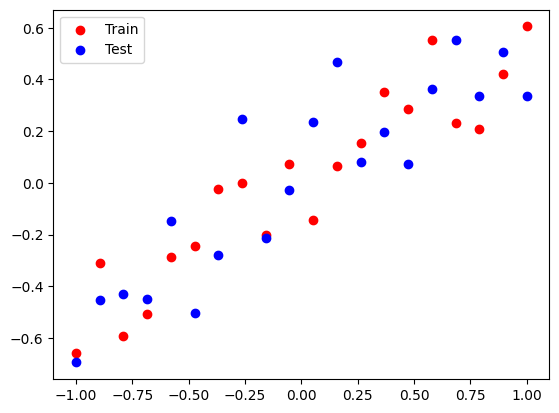

In [8]:
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

# Regression Model:

In [9]:
model_1=Sequential()
model_1.add(Dense(128,input_dim=1,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='linear'))

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
adam=Adam(learning_rate=0.01)

model_1.compile(loss='mean_squared_error', optimizer=adam,metrics=['mean_squared_error'])


In [12]:
history=model_1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0459 - val

In [13]:
# Evaluate the model
_, train_mse = model_1.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0007227252353914082, Test: 0.044641345739364624


In [14]:
y_pred_1=model_1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


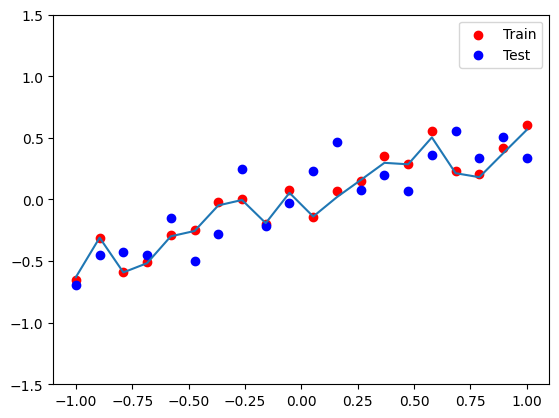

In [16]:
plt.figure()
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.plot(x_test,y_pred_1)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

# DropOut Model:

In [17]:
model2=Sequential()
model2.add(Dense(128,input_dim=1,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model2.compile(optimizer=adam,loss='mse',metrics=['mse'])


In [19]:
drop_out_history=model2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1677 - mse: 0.1677 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0653 - val_mse: 0.0653
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0234 - mse:

In [20]:
# Evaluate the model
_,train_mse=model2.evaluate(x_train,y_train,verbose=0)
_,test_mse=model2.evaluate(x_test,y_test,verbose=0)
print('Train: {},Test: {}'.format(train_mse,test_mse))

Train: 0.012526367790997028,Test: 0.04199124127626419


In [21]:
y_pred_2=model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


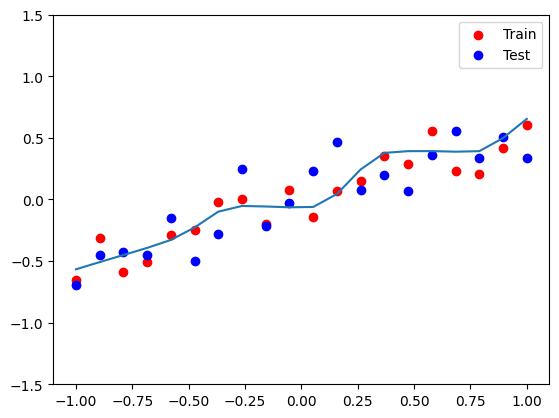

In [26]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()